## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

#####  $$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx = \frac{2}{3}  \label{eq1}\tag{1}
$$

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [12]:
def midpoint_rule_mod(func, a, b, eps):
  
    def f_help(N):
        summa = 0
        h = abs(b-a)/N 
        for i in range(N): 
            x = a + i*h + h/2 
            summa += func(x)*h 
        return(summa)

    n = 1
    delta = abs(f_help(n) - f_help(2*n))
    while delta >= eps:
        n = 2*n
        delta = abs(f_help(n) - f_help(2*n))
    i = f_help(n)  
    return i, n                                                           
                                 
def f(x):
    return 7*x**3 - 8*x**2 - 3*x +3

i, n = midpoint_rule_mod(f, -1, 1, 10**(-10))
# Вычислим значение интеграла с помощью этой функции:
print('Значение интеграла = {:.4f}'.format(i))
print('Число элементарных отрезков = {}'.format(n))
print('Отклонение от точного значения ={}'.format(abs(i - 2/3)))

Значение интеграла = 0.6667
Число элементарных отрезков = 262144
Отклонение от точного значения =7.760769804576739e-11


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [10]:
from scipy.special import roots_legendre

import numpy as np

def Leg(f, N): 

    nodes = roots_legendre(N)[0] 
    F = f(nodes)
    wk = roots_legendre(N)[1]
    s = 0
    for n in range(N):
        s+= F[n]*wk[n]
    return(s)

for n in [1, 2, 3, 4, 5, 6]:
    print('Степень полинома = {}; Значение интеграла = {:.4f}; delta = {}'.format(n, Leg(f, n), abs(2/3 -Leg(f,n))))

Степень полинома = 1; Значение интеграла = 6.0000; delta = 5.333333333333333
Степень полинома = 2; Значение интеграла = 0.6667; delta = 7.771561172376096e-16
Степень полинома = 3; Значение интеграла = 0.6667; delta = 2.7755575615628914e-15
Степень полинома = 4; Значение интеграла = 0.6667; delta = 1.1102230246251565e-16
Степень полинома = 5; Значение интеграла = 0.6667; delta = 1.887379141862766e-15
Степень полинома = 6; Значение интеграла = 0.6667; delta = 2.886579864025407e-15


##### Минимальный номер полинома в нашей задаче должен быть равен 2, именно из-за этого получилась такая огромная ошибка при первом вычислении, а при использовании номеров, больше второго, ошибка практически не менялась.

Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

##### Чтобы сравнивать количество узлов, нужно научиться задавать точность в методе с полиномами Лежандра. Будем увеличивать кол-во узлов до тех пор, пока отклонение о точного решения не станет меньше заданной точности.

In [13]:
def nodes_number(Leg, f, I, eps):
    n = 1 
    while True:
        if abs(Leg(f, n) - I) >= eps:
            n = n + 1
        else:
            return(n)
        

I = 2/3 
for i in range(1, 13): 
    eps = 10**(-i)       
    print('Точность = {}; количество узлов для равномерной сетки = {}; количество узлов для второго метода = {}'.format(
    eps, midpoint_rule_mod(f, -1, 1, eps)[1], nodes_number(Leg, f, I, eps)))

Точность = 0.1; количество узлов для равномерной сетки = 8; количество узлов для второго метода = 2
Точность = 0.01; количество узлов для равномерной сетки = 32; количество узлов для второго метода = 2
Точность = 0.001; количество узлов для равномерной сетки = 64; количество узлов для второго метода = 2
Точность = 0.0001; количество узлов для равномерной сетки = 256; количество узлов для второго метода = 2
Точность = 1e-05; количество узлов для равномерной сетки = 1024; количество узлов для второго метода = 2
Точность = 1e-06; количество узлов для равномерной сетки = 2048; количество узлов для второго метода = 2
Точность = 1e-07; количество узлов для равномерной сетки = 8192; количество узлов для второго метода = 2
Точность = 1e-08; количество узлов для равномерной сетки = 32768; количество узлов для второго метода = 2
Точность = 1e-09; количество узлов для равномерной сетки = 65536; количество узлов для второго метода = 2
Точность = 1e-10; количество узлов для равномерной сетки = 2621

#####  Методу, использующему полиномы Лежандра, для достижения заданной точности требуется значительно меньше узлов.

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

#####  Преобразуем  интеграл к следующему виду:
$$
5\int_{-1}^{1} (875(x+1)^3 - 200(x+1)^2 - 15(x+1) + 3) dx = \frac{44140}{3} 
$$

##### Теперь используем полиномы Лежандра

In [15]:
from scipy.special import roots_legendre
import numpy as np

def F(x):
    return 875*(x+1)**3 - 200*(x+1)**2 -15*(x+1)+3

I = Leg(F, 2) # Берём именно 2, так как 2*2-1 = 3, что >= степени полинома (3), то есть вычисление должно производиться точно.
print('Значение интеграла = {}'.format(I*5))
print('Отклонение от точного значения = {}'.format(abs(5*I - 44140/3)))

Значение интеграла = 14713.333333333332
Отклонение от точного значения = 1.8189894035458565e-12


Сравните результат с точным значением интеграла.

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

##### Пользуясь таблицами, выясняем, что нам подойдёт базис из полиномов Чебышева первого рода. Для нахождения узлов и весов будем использовать библиотечную функцию scipy.special.roots_chebyt

In [17]:
from scipy.special import roots_chebyt
import numpy as np

def Cheb(f, N): # N - степень полинома

    nodes = roots_chebyt(N)[0] 
    F = f(nodes)
    wk = roots_chebyt(N)[1]
    s = 0
    for n in range(N):
        s+= F[n]*wk[n]
    return(s)

def cos(x): # Интегрируемая функция 
    return(np.cos(np.pi*2*x))

##### Исходный интеграл равен:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}} = \frac{1}{2}\pi J_0(2\pi)
$$

Отклонение = 1.1102230246251565e-16 кол-во узлов = 15
Отклонение = 1.1102230246251565e-16 кол-во узлов = 16
Отклонение = 2.220446049250313e-16 кол-во узлов = 17
Отклонение = 0.0 кол-во узлов = 18
Отклонение = 0.0 кол-во узлов = 19


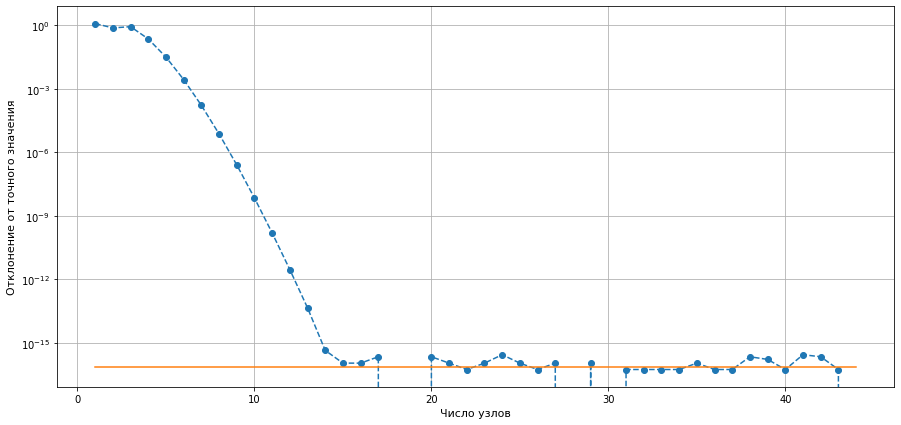

In [20]:
from scipy import special
import matplotlib.pyplot as plt

J0 = special.jn(0, 2*np.pi) 
I = np.pi*J0/2
# Построим график зависимости отклонения численного решения от аналитического
i_lst = []
y_lst = []
const = []
for i in range(1,45):
    const.append(2.2*10**(-16)*I)
    i_lst.append(i)
    y_lst.append(abs(I - Cheb(cos, i)/2)) # отклонения

plt.figure(figsize=(15, 7)) 
plt.semilogy(i_lst, y_lst, '--o')
plt.semilogy(i_lst, const)  # Также построим значение требуемой точности, равное 2.2*10^(-16)*точное значение интеграла
plt.grid()
plt.xlabel('Число узлов', fontsize = 11)
plt.ylabel('Отклонение от точного значения', fontsize = 11)
print('Отклонение =', abs(I - Cheb(cos,15)/2),'кол-во узлов = 15')
print('Отклонение =',abs(I - Cheb(cos,16)/2), 'кол-во узлов = 16')
print('Отклонение =',abs(I - Cheb(cos,17)/2), 'кол-во узлов = 17')
print('Отклонение =',abs(I - Cheb(cos,18)/2), 'кол-во узлов = 18')
print('Отклонение =',abs(I - Cheb(cos,19)/2), 'кол-во узлов = 19')

##### Таким образом, первый раз точность вычислений превышает заданную при использовании 18-ти узлов

## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

In [22]:
# Функция общего вида
def FE_sol(a, b, lmbd, K, g, N):
    
    nodes = special.ps_roots(N)[0] # Задаём узлы и веса
    w = special.ps_roots(N)[1]
    A = np.empty((N, N)) # Матрица для решения системы уравнений
    
    for i in range(N):
        for j in range(N):
            A[i, j] = w[j] * K(nodes[i], nodes[j])

    Y = np.eye(N) - lmbd*A # Итоговая матрица, которая умножается на вектор f
    b = [g(_) for _ in nodes]
    
    res = np.linalg.solve(Y, b) # Решаем систему уравнений, о которой говорилось в теории выше
    
    return nodes, res

##### Теперь нужно проверить, что функция работает, и сравнить полученную функцию с точным решением предложенного уравнения Фредгольма для разных N.

Text(0.5, 1.0, 'Сравним полученные в узлах значения функции с точными значениями')

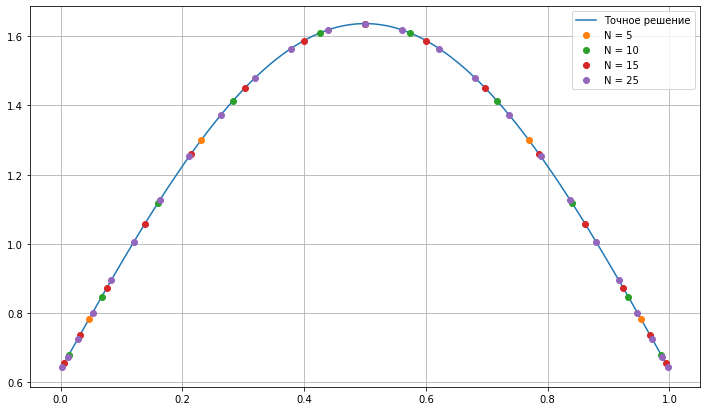

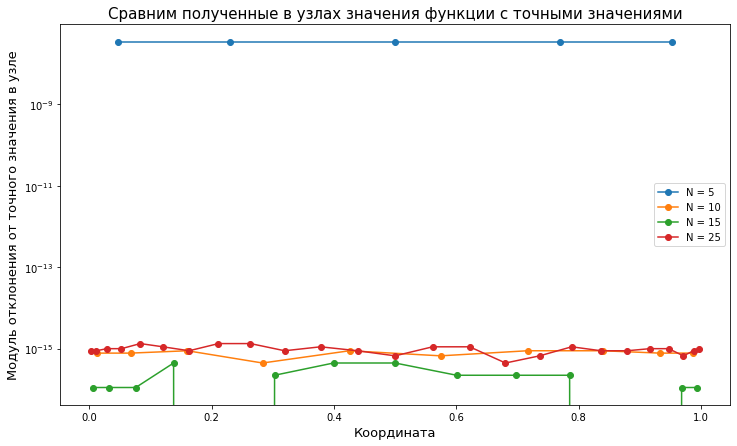

In [24]:
# Заданные параметры для предложенного уравнения
a = 0
b = 1
lmbd = 1/2

# Заданные функции
def K(x, t):
    return 1

def g(x):
    return np.sin(np.pi*x)

plt.figure(figsize=(12, 7)) 


# Сначала создадим списки для построения точного решения
x_lst = np.linspace(0, 1, 100)
y_lst = np.sin(np.pi*x_lst) + 2/np.pi
plt.plot(x_lst, y_lst, label = 'Точное решение')
# Теперь построим точки численного решения для разных N
for N in [5, 10, 15, 25]:
    xx_lst = FE_sol(a, b, lmbd, K, g, N)[0]
    yy_lst = FE_sol(a, b, lmbd, K, g, N)[1]
    plt.plot(xx_lst, yy_lst, 'o', label = 'N = %s' % N)

plt.grid()   
plt.legend()
plt.figure(figsize=(12, 7)) 
for N in [5, 10, 15, 25]:
    xx_lst = FE_sol(a, b, lmbd, K, g, N)[0]
    yy_lst = FE_sol(a, b, lmbd, K, g, N)[1]
    delt_lst = abs(np.sin(np.pi*xx_lst) + 2/np.pi - yy_lst)
    
    plt.semilogy(xx_lst, delt_lst, '-o', label = 'N = %s' % N)
    plt.grid()
    plt.legend()
    plt.xlabel('Координата', fontsize = 13)
    plt.ylabel('Модуль отклонения от точного значения в узле', fontsize = 13)
plt.title('Сравним полученные в узлах значения функции с точными значениями', fontsize = 15)

##### На каком N можно остановиться? Будем считать модуль отклонения полученного значения функции от её точного значения в каждом узле. Останавливаться будем тогда, когда среднее значение этих отклонений будет меньше заранее заданной точности.

In [25]:
def opt_N(FE_sol, a, b, lmbd, K, g, eps):
    delt=[] # Будущий массив отклонений
    N = 1
    while 0==0 :
        xx_lst = FE_sol(a, b, lmbd, K, g, N)[0]
        yy_lst = FE_sol(a, b, lmbd, K, g, N)[1] # Полученные значения
        y_true = np.sin(np.pi*xx_lst) + 2/np.pi # Точное значение в узлах
        delt = np.array(abs(yy_lst - y_true))
        d = np.mean(delt)               
        if d > eps:
            N = N + 1
        else:
            return N

Text(0, 0.5, 'Необходимое количество узлов')

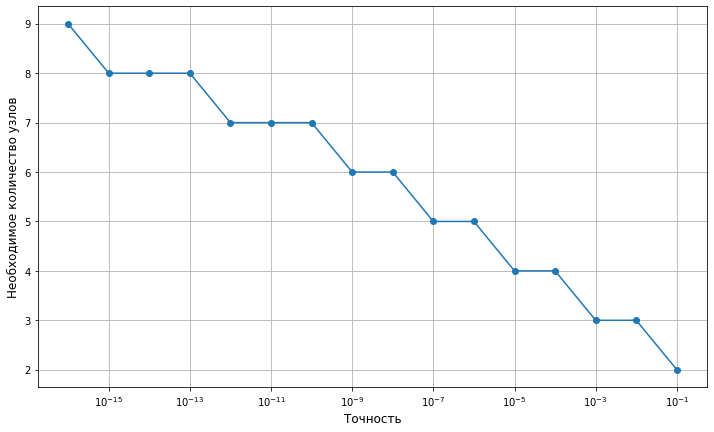

In [27]:
N_lst = []
x = []
for i in range(1, 17): # Рассмотрим точность до 10^(-16)
    N_lst.append(opt_N(FE_sol, a, b, lmbd, K, g, eps = 10**(-i)))
    x.append(10**(-i))
NN = np.array(N_lst)
x = np.array(x)

plt.figure(figsize=(12, 7)) 
plt.semilogx(x, NN, '-o')
plt.grid()
plt.xlabel('Точность', fontsize =12)
plt.ylabel('Необходимое количество узлов', fontsize =12)

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

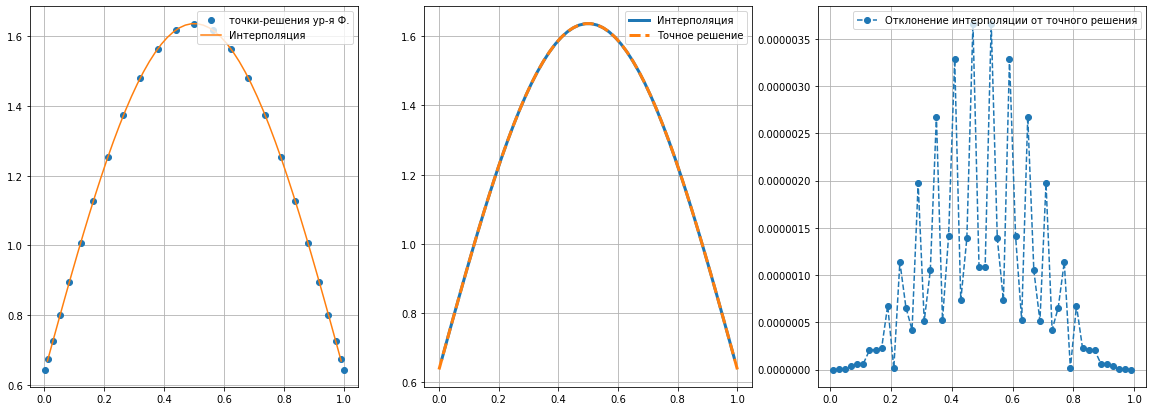

In [28]:
from scipy import interpolate

xx_lst = FE_sol(a, b, lmbd, K, g, 25)[0] # N = 25
yy_lst = FE_sol(a, b, lmbd, K, g, 25)[1]

plt.figure(figsize=(20, 7)) 

ff = interpolate.interp1d(xx_lst, yy_lst, kind = 'cubic') # Используем библиотечный интерполятор
xnew = np.arange(0.01, 1, 1/50)
ynew = ff(xnew) 
plt.subplot(131)
plt.plot(xx_lst, yy_lst, 'o', label = 'точки-решения ур-я Ф.')
plt.plot(xnew, ynew, '-', label ='Интерполяция')
plt.grid()
plt.legend(loc =1)

plt.subplot(132)
plt.plot(xnew, ynew, '-',linewidth=3, label ='Интерполяция')
plt.plot(x_lst, y_lst, '--',linewidth=3, label = 'Точное решение')
plt.grid()
plt.legend()

plt.subplot(133)

yyy_lst = abs(np.sin(np.pi*xnew) + 2/np.pi - ynew)

plt.plot(xnew, yyy_lst, '--o', label = 'Отклонение интерполяции от точного решения')
plt.grid()
plt.legend(loc=1)

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

In [29]:
def f(g, K, lmbd, N, xx, FE_sol):
    
    summ = 0
    x = FE_sol(a, b, lmbd, K, g, N)[0] # Узлы
    y = FE_sol(a, b, lmbd, K, g, N)[1] # Значение интерполируемой функции в узлах

    w = special.ps_roots(N)[1]
    A = np.empty((N, N)) # Матрица для решения системы уравнений
    
    for j in range(N):
        summ += w[j] * K(xx, x[j])*y[j]
    summ = summ*lmbd
    
    return g(xx) + summ

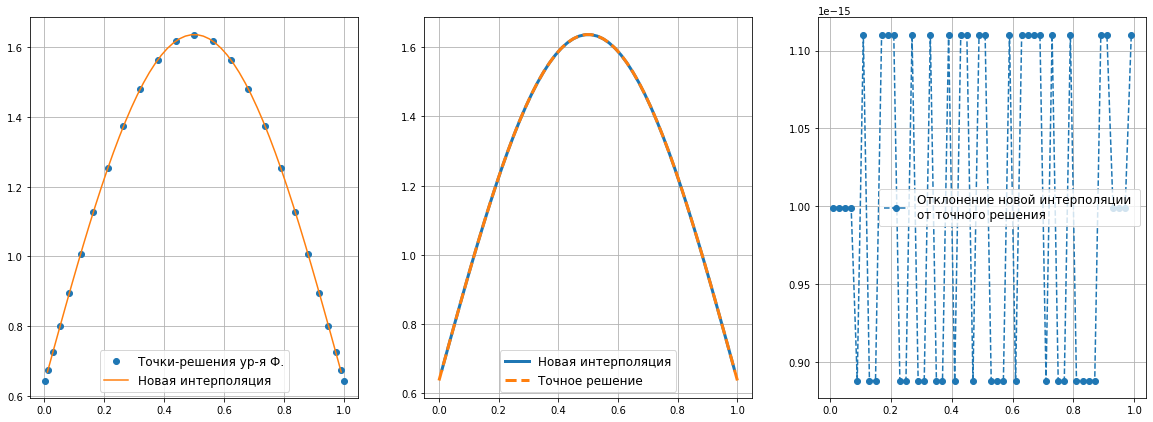

In [30]:
# Заданные параметры для предложенного уравнения
a = 0
b = 1
lmbd = 1/2

# Заданные функции
def K(x, t):
    return 1

def g(x):
    return np.sin(np.pi*x)

xnew = np.arange(0.01, 1, 1/50)   # Новая интерполяция на старой равномерной сетке
ynew = f(g, K, lmbd, 25, xnew, FE_sol)

xx_lst = FE_sol(a, b, lmbd, K, g, 25)[0] # N = 25
yy_lst = FE_sol(a, b, lmbd, K, g, 25)[1] # точки-решения уравнения Фредгольма

x_lst = np.linspace(0, 1, 100)  # Задаём точное решение предложенного уравнения 
y_lst = np.sin(np.pi*x_lst) + 2/np.pi

ff = interpolate.interp1d(xx_lst, yy_lst, kind = 'cubic')
delta_new = ff(xnew)

plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.plot(xx_lst, yy_lst, 'o', label = 'Точки-решения ур-я Ф.')
plt.plot(xnew, ynew, label = 'Новая интерполяция')
plt.grid()
plt.legend(loc=8, fontsize = 12)

plt.subplot(132)
plt.plot(xnew, ynew, linewidth = 3, label = 'Новая интерполяция')
plt.plot(x_lst, y_lst, '--',linewidth = 3, label = 'Точное решение')
plt.grid()
plt.legend(loc=8, fontsize = 12)

plt.subplot(133)
yyy_lst = abs(np.sin(np.pi*xnew) + 2/np.pi - ynew)
plt.plot(xnew, yyy_lst, '--o', label = 'Отклонение новой интерполяции \nот точного решения')
plt.grid()
plt.legend(loc=7, fontsize = 12)

##### Таким образом, можно видеть, что новая интерполяция отклоняется от точного решения меньше, чем старая. Для наглядности совместим графики ошибок.

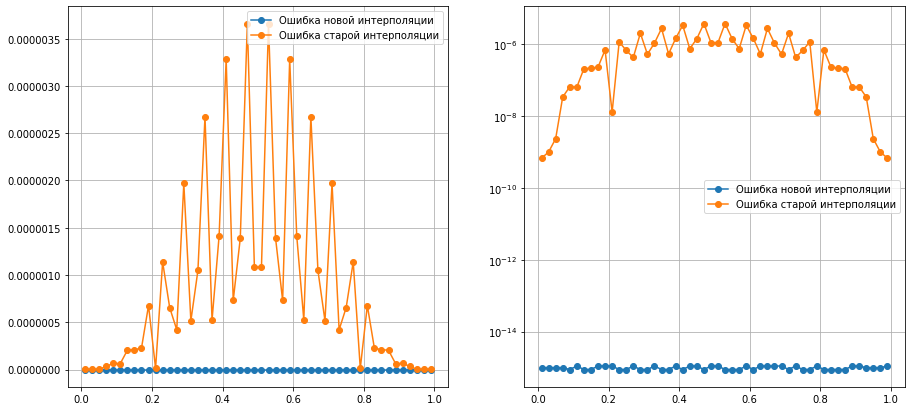

In [31]:
xnew = np.arange(0.01, 1, 1/50)   # Новая интерполяция на старой равномерной сетке
ynew = f(g, K, lmbd, 25, xnew, FE_sol)
yyy_lst = abs(np.sin(np.pi*xnew) + 2/np.pi - ynew) # Ошибка новой интерполяции

ff = interpolate.interp1d(xx_lst, yy_lst, kind = 'cubic') # Используем библиотечный интерполятор
ynew_old = ff(xnew) 
yyy_old_lst = abs(np.sin(np.pi*xnew) + 2/np.pi - ynew_old)

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.plot(xnew, yyy_lst, '-o', label = 'Ошибка новой интерполяции')
plt.plot(xnew, yyy_old_lst, '-o', label = 'Ошибка старой интерполяции')
plt.grid()
plt.legend(loc = 1)

plt.subplot(122)
plt.semilogy(xnew, yyy_lst, '-o', label = 'Ошибка новой интерполяции')
plt.semilogy(xnew, yyy_old_lst, '-o', label = 'Ошибка старой интерполяции')
plt.grid()
plt.legend(loc = 'best')

##### Теперь можно уверенно сказать, что последний способ интерполяции работает значительно лучше, так как его отклонение от точного решения на несколько порядков меньше, чем отклонение прямого метода интерполяции.